# 人脸跟踪流程

以下示例说明如何使用`facenet_pytorch`Python软件包使用MTCNN在图像数据集上执行人脸检测和跟踪。

In [1]:
from facenet_pytorch import MTCNN
import torch
import mmcv, cv2
import numpy as np
from PIL import Image, ImageDraw
from IPython import display

#### 判断是否有nvidia GPU可用

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("在该设备上运行: {}".format(device))

在该设备上运行: cuda:0


#### 定义MTCNN模块

需要注意的是，由于MTCNN是一组神经网络和其他代码，因此必须按以下方式传递设备以在需要时内部启用对象复制。

有关更多详细信息，请参见`help(MTCNN)`。

In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

#### 获取样本视频

我们首先加载一个包含一些人脸的视频。使用mmlabs的`mmcv`PyPI软件包读取视频帧（可以使用`pip install mmcv`安装）。然后将帧转换为PIL图像。

In [4]:
video = mmcv.VideoReader("video.mp4")
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video("video.mp4", width=640)

#### 通过MTCNN运行视频

我们迭代每个帧，检测人脸，并在视频帧上绘制它们的边界框。

In [5]:
frames_tracked = []
for i, frame in enumerate(frames):
    print("\r当前帧: {}".format(i + 1), end="")

    # 检测人脸
    boxes, _, _ = mtcnn.detect(frame)

    # 绘制人脸框
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

    # 添加到图像列表
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print("\n结束")

当前帧: 105
结束


#### 显示检测结果

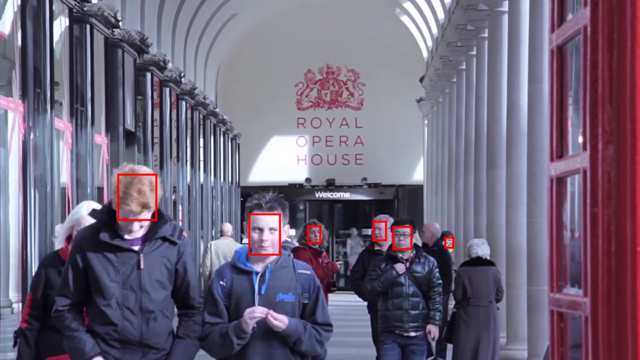

In [6]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

#### 保存跟踪后的视频

In [7]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*"FMP4")
video_tracked = cv2.VideoWriter("video_tracked.mp4", fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(np.asarray(frame)[:, :, ::-1])
video_tracked.release()

OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
